In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bench = 'slow'
minN = 1
maxN = 21

In [3]:
def readTimingsFile(num, base):
    res = []
    file = open('./data/' + base + '/' + str(num) + '/operator-timings-filtered.txt', encoding="utf8").read()
    for ind, line in enumerate(file.split('\n')):
        if line == '':
            continue
        splitLine = line.split(",")
        if (splitLine[1] == "processorCollected"):
            continue
        res.append([num, str(splitLine[1]), int(splitLine[2]), int(splitLine[3])])
    return res

results = []
for i in range(minN, maxN):
    results.append(readTimingsFile(i, bench))

In [4]:
eventMap = {
    "markedNext": "Marked as next",
    "phaseOutCompleted": "Fully phased-out",
    "activeObjectsCreated": "All objects created",
    "markedActive": "Marked as active"
}

events = [f"Revision {x[2]}: {eventMap[x[1]]}" for x in results[0]]
timings = []
for i in range(len(results)):
    timings.append([x[3] for x in results[i]])

In [5]:
print(events)
print(timings)

['Revision 1: All objects created', 'Revision 2: Marked as next', 'Revision 2: Marked as active', 'Revision 2: All objects created', 'Revision 1: Fully phased-out']
[[1639164125213100328, 1639164179610023733, 1639164179867286808, 1639164182779701178, 1639164205484120239], [1639166341973281404, 1639166397218088302, 1639166397470873541, 1639166399887353795, 1639166422651098236], [1639166544043697203, 1639166598008606122, 1639166598238864519, 1639166599358695847, 1639166623272200866], [1639166782772732212, 1639166836526463174, 1639166836758593248, 1639166837852344535, 1639166866257355874], [1639167033742835589, 1639167086963980319, 1639167087635448210, 1639167089987540386, 1639167112835268000], [1639167273567549000, 1639167326084583135, 1639167326318103559, 1639167328128970066, 1639167350907272741], [1639167527749240967, 1639167583195996499, 1639167583629406421, 1639167585561645730, 1639167610262303829], [1639167763972203587, 1639167819079096053, 1639167819397619198, 1639167821806066170, 

In [6]:
def getUserUpgradeTiming(num, base):
    file = open('./data/' + base + '/' + str(num) + '/user-timings.txt', encoding="utf8").read()
    return int(file.split('\n')[0])

for i in range(minN, maxN):
    timings[i - 1][0] = getUserUpgradeTiming(i, bench)

events[0] = "Upgrade Requested"

In [7]:
print(timings)

[[1639164178564, 1639164179610023733, 1639164179867286808, 1639164182779701178, 1639164205484120239], [1639166395745, 1639166397218088302, 1639166397470873541, 1639166399887353795, 1639166422651098236], [1639166596815, 1639166598008606122, 1639166598238864519, 1639166599358695847, 1639166623272200866], [1639166835198, 1639166836526463174, 1639166836758593248, 1639166837852344535, 1639166866257355874], [1639167086081, 1639167086963980319, 1639167087635448210, 1639167089987540386, 1639167112835268000], [1639167325170, 1639167326084583135, 1639167326318103559, 1639167328128970066, 1639167350907272741], [1639167581559, 1639167583195996499, 1639167583629406421, 1639167585561645730, 1639167610262303829], [1639167817981, 1639167819079096053, 1639167819397619198, 1639167821806066170, 1639167847445161916], [1639168065901, 1639168067194548526, 1639168067410378209, 1639168068742457283, 1639168094317273838], [1639168317451, 1639168318487860202, 1639168318837948742, 1639168320905732905, 16391683452

In [8]:
initNanos = []
for i in range(len(timings)):
    initNano = timings[i][0] * (10 ** 6)
    initNanos.append(initNano)
    timings[i][0] = 0
    for j in range(1, len(timings[i])):
        timings[i][j] = (timings[i][j] - initNano) / (10 ** 9)

In [9]:
print(timings)

[[0, 1.046023733, 1.303286808, 4.215701178, 26.920120239], [0, 1.473088302, 1.725873541, 4.142353795, 26.906098236], [0, 1.193606122, 1.423864519, 2.543695847, 26.457200866], [0, 1.328463174, 1.560593248, 2.654344535, 31.059355874], [0, 0.882980319, 1.55444821, 3.906540386, 26.754268], [0, 0.914583135, 1.148103559, 2.958970066, 25.737272741], [0, 1.636996499, 2.070406421, 4.00264573, 28.703303829], [0, 1.098096053, 1.416619198, 3.82506617, 29.464161916], [0, 1.293548526, 1.509378209, 2.841457283, 28.416273838], [0, 1.036860202, 1.386948742, 3.454732905, 27.840286186], [0, 1.335239563, 2.11672169, 4.23988321, 25.35837601], [0, 0.96662131, 1.461810314, 3.399719108, 24.646360043], [0, 1.413811555, 1.506800655, 4.568255578, 24.322001432], [0, 0.846055715, 1.19093226, 3.485104068, 23.923321181], [0, 1.255508038, 1.824151442, 4.207610331, 28.683978166], [0, 1.067605537, 1.31542026, 2.899600638, 26.314473224], [0, 0.959151297, 1.309412724, 3.20463003, 29.409001155], [0, 1.017797835, 1.2668501

In [10]:
from statistics import mean

avgTimings = [float(sum(col))/len(col) for col in zip(*timings)]

In [11]:
print(avgTimings)

[0.0, 1.1313494972, 1.4710039764, 3.5297611742, 27.0370760143]


In [12]:
def getMessageTimings(num, base):
    file = open('./data/' + base + '/' + str(num) + '/message-timings.txt', encoding="utf8").read()
    res = []
    for ind, line in enumerate(file.split('\n')):
        if line == '':
            continue
        splitLine = line.split(",")
        res.append([int(splitLine[0]), int(splitLine[3])])
    return res


In [13]:
import sys
import math
# Find line segment x-values
def findExtremes(revNum, userTimings):
    minEnd = sys.maxsize
    maxEnd = ~sys.maxsize
    for entry in userTimings:
        if entry[0] != revNum:
            continue
        minEnd = min(minEnd, entry[1])
        maxEnd = max(maxEnd, entry[1])
    return minEnd, maxEnd


def toSecondsFromBegin(timeNano, beginNano):
    return (timeNano - beginNano) / (10 ** 9)

revProcessingTransTimings = []
for i in range(minN, maxN):
    userTimings = getMessageTimings(i, bench)
    first1, last1 = findExtremes(1, userTimings)
    first2, last2 = findExtremes(2, userTimings)
    if (last1 < first2):
        print(i, "no overlap")

    first1 = 0 # fit to graph
    # convert to seconds from begin
    initNano = initNanos[i - 1]
    last1 = toSecondsFromBegin(last1, initNano) 
    first2 = toSecondsFromBegin(first2, initNano)
    last2 = toSecondsFromBegin(last2, initNano)
    revProcessingTransTimings.append([first1, last1, first2, last2])

5 no overlap
6 no overlap
8 no overlap
11 no overlap
12 no overlap
13 no overlap
14 no overlap
15 no overlap
17 no overlap


In [14]:
print(revProcessingTransTimings)

[[0, 20.580304473, 18.402575212, 60.993124311], [0, 22.001418838, 19.274333408, 61.580348607], [0, 21.582193997, 17.001401175, 61.408493488], [0, 24.279165374, 19.020363919, 67.689182734], [0, 19.316487786, 22.078948613, 61.124302532], [0, 19.8098942, 20.204099452, 61.027300525], [0, 21.130511364, 19.330197866, 61.585776625], [0, 20.727712661, 21.257980824, 61.257240234], [0, 23.388203917, 18.718182007, 66.932739475], [0, 20.992714033, 19.679481872, 61.556599851], [0, 20.008957639, 21.720436167, 62.174071655], [0, 18.522388973, 20.444920625, 61.228170056], [0, 19.543030527, 20.831457305, 61.524682661], [0, 18.015371177, 19.87263149, 66.022139373], [0, 22.266310319, 22.272172461, 61.395707643], [0, 20.862369601, 17.652752346, 61.170709719], [0, 21.7470777, 22.518044487, 61.137725387], [0, 21.514053168, 19.08081816, 61.096905605], [0, 21.332128164, 18.567670918, 66.719804308], [0, 20.814471328, 20.247038555, 61.136793915]]


In [15]:
avgProcessingTransTimings = [float(sum(col))/len(col) for col in zip(*revProcessingTransTimings)]

In [16]:
print(avgProcessingTransTimings)

[0.0, 20.92173826195, 19.9087753431, 62.4380909352]


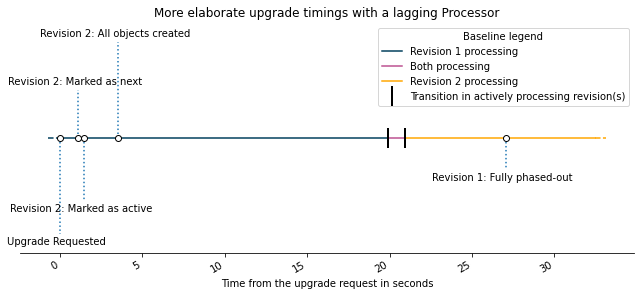

In [21]:
levels = np.tile([-1, 0.5, -0.66, 1, -0.33, 1],
                 int(np.ceil(len(events)/6)))[:len(events)]

fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.set(title="More elaborate upgrade timings with a lagging Processor")

markerline, stemline, baseline = ax.stem(avgTimings, levels,
                                         linefmt=":", basefmt="k-", 
                                         use_line_collection=True)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(avgTimings)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(avgTimings, levels, events, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="center")


plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

baseline.set_visible(False)
baseY = baseline.get_ydata()[0]
baseYs = [baseY, baseY]
xRev1 = [0, avgProcessingTransTimings[2]]
#xNone = [avgProcessingTransTimings[1], avgProcessingTransTimings[2]]
xBothProcessing = [avgProcessingTransTimings[2], avgProcessingTransTimings[1]]
xRev2 = [avgProcessingTransTimings[1], avgProcessingTransTimings[3] - 30]

# add colored baselines
pFirst = plt.plot(xRev1, baseYs, '#003f5c', label="Revision 1 processing")
plt.plot(xBothProcessing, baseYs, '#bc5090', label="Both processing")
pLast = plt.plot(xRev2, baseYs, '#ffa600', label="Revision 2 processing")
# add ends of baseline
plt.plot([-0.7, 0], baseYs, '--', color=pFirst[0].get_color())
plt.plot([xRev2[1], xRev2[1] + 0.7], baseYs, '--', color=pLast[0].get_color())

# plot transition markers
plt.plot([avgProcessingTransTimings[2]], [baseY], marker="|", color='white', markersize=20, markeredgecolor='black', mew=2, label='Transition in actively processing revision(s)')
plt.plot([avgProcessingTransTimings[1]], [baseY], marker="|", color='white', markersize=20, markeredgecolor='black', mew=2)


plt.legend(loc="upper right", title="Baseline legend")
ax.margins(y=0.1)
plt.xlabel("Time from the upgrade request in seconds")
plt.show()

In [18]:
def readDetailedMessageTimings(base, num):
    res = []
    file = open('./data/' + base + '/' + str(num) + '/message-timings.txt', encoding="utf8").read()
    for ind, line in enumerate(file.split('\n')):
        if line == '':
            continue
        splitLine = line.split(",")
        res.append([num, int(splitLine[0]), int(splitLine[1]), int(splitLine[2]), int(splitLine[3]), float(splitLine[4])])
    return res

messTimingsDetailed = []
for i in range(1, 21):
    messTimingsDetailed = messTimingsDetailed + readDetailedMessageTimings('fast', i)

In [19]:
import pandas as pd
df = pd.DataFrame(messTimingsDetailed, columns=['benchNum', 'version', 'id', 'beginTime', 'endTime', 'latency'])

In [20]:
firstMsgLatencies = []
df_filtered = []
for i in range(1, 21):
    # ensure no duplicates and no lost message (i.e. checking for duplicate IDs, missing IDs)
    df_bench = df[df['benchNum'] == i].reset_index()
    msg_ids = df_bench['id']
    msg_ids = msg_ids.sort_values(ascending=True).values
    for j in range(1, len(msg_ids)):
        if msg_ids[j] == msg_ids[j - 1]:
            print("DUPLICATE FOUND")
        elif msg_ids[j] > (msg_ids[j-1] + 1):
            print("MESSAGE(s) LOST")